In [1]:
import pandas as pd
import seaborn as sns
import numpy as nop
import matplotlib.pyplot as plt
df = pd.read_csv("./CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [2]:
df.shape
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [3]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes not in ['O', 'object']]
numerical_feature

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [4]:
num_data = df[numerical_feature]
num_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot:ylabel='price'>

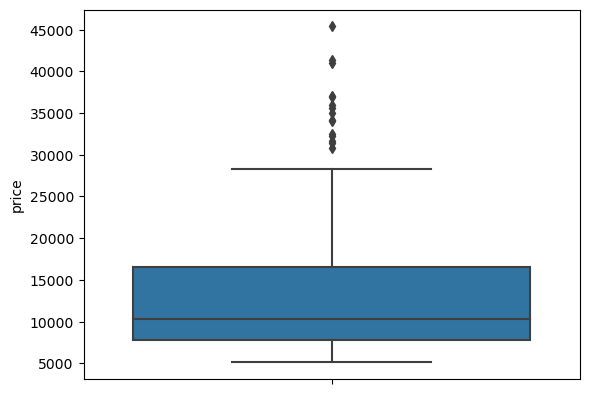

In [5]:

sns.boxplot(y='price', data=num_data)

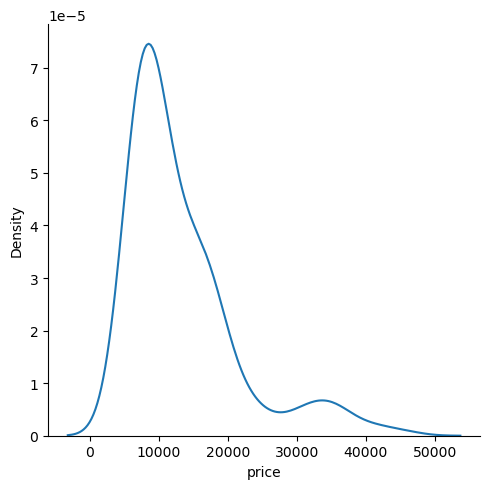

In [6]:
sns.displot(x='price', data=num_data, kind='kde')

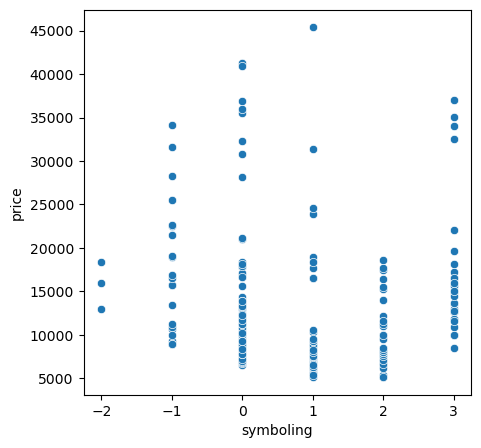

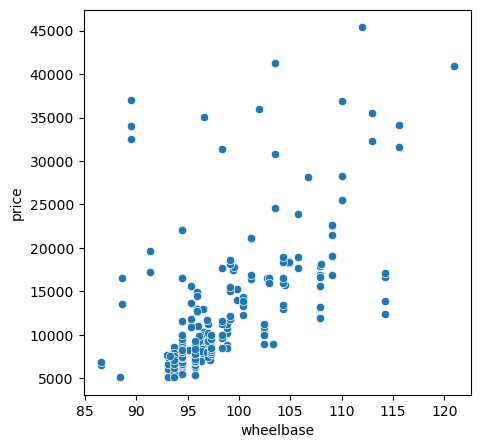

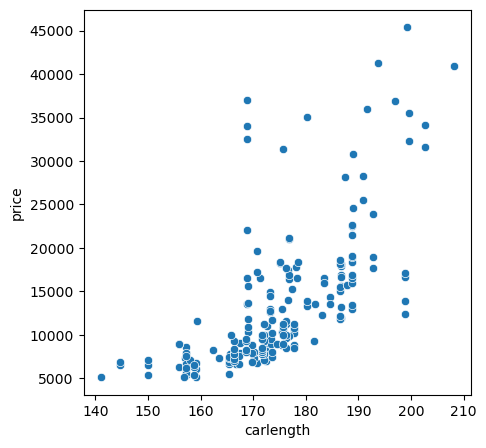

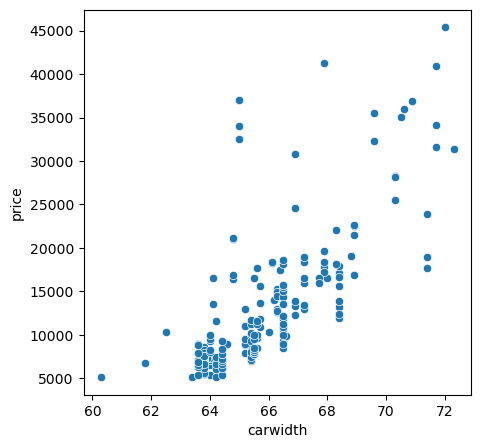

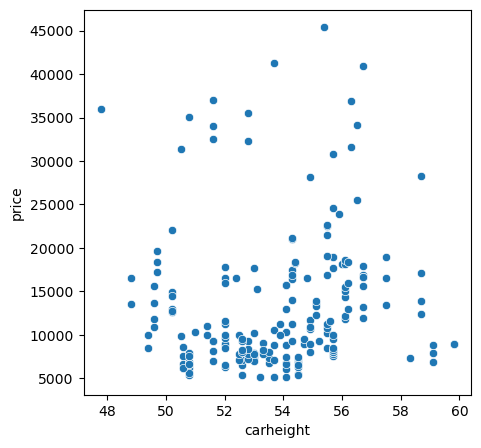

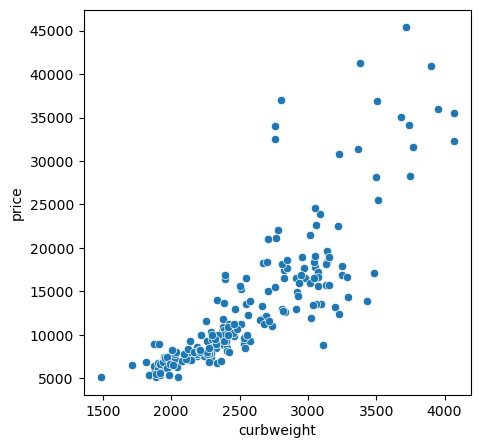

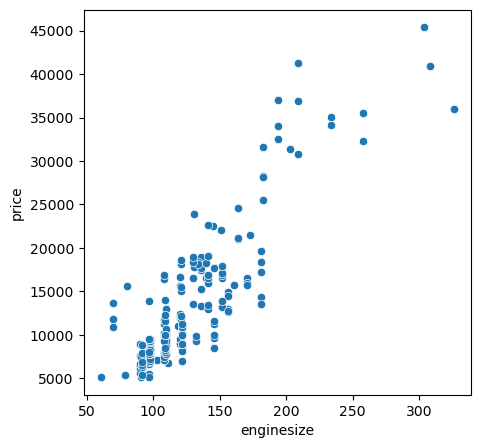

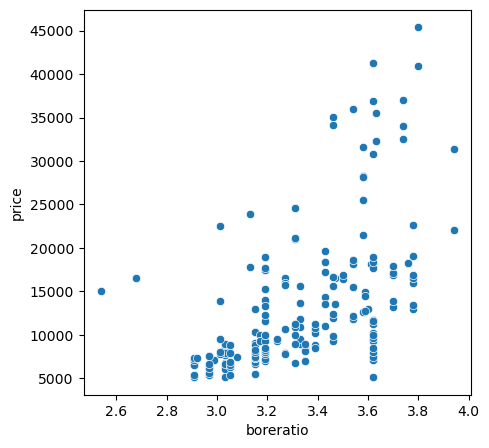

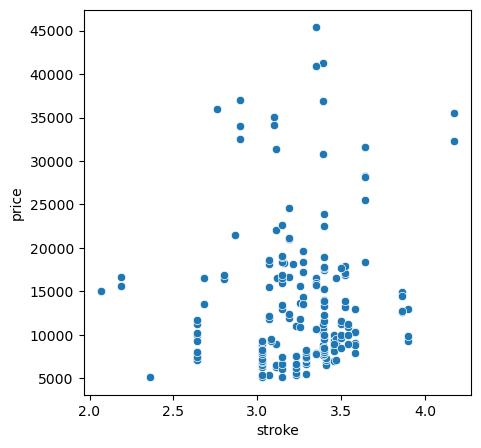

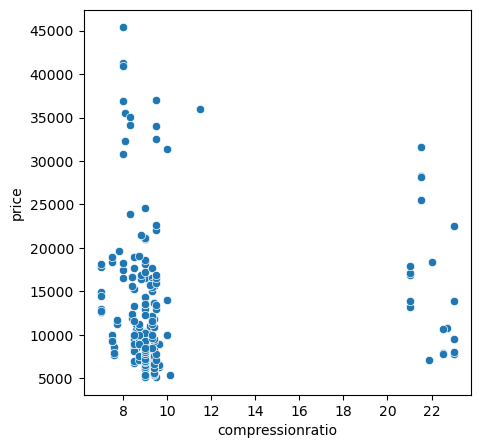

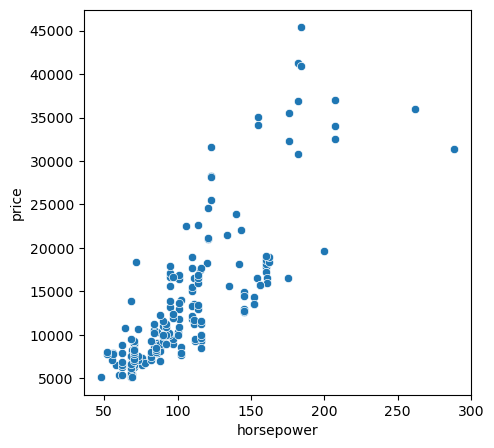

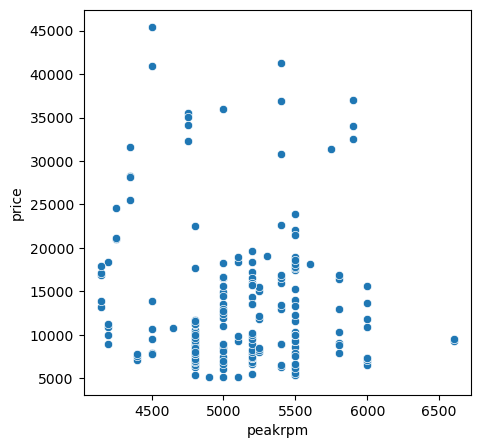

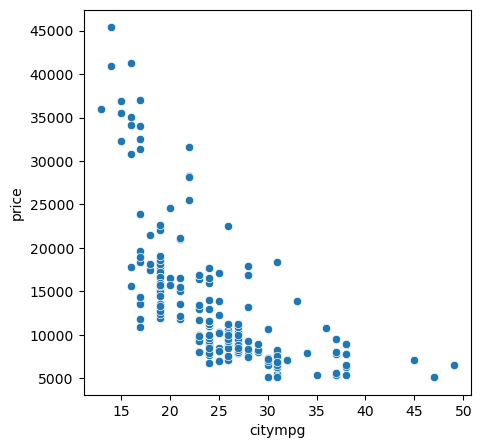

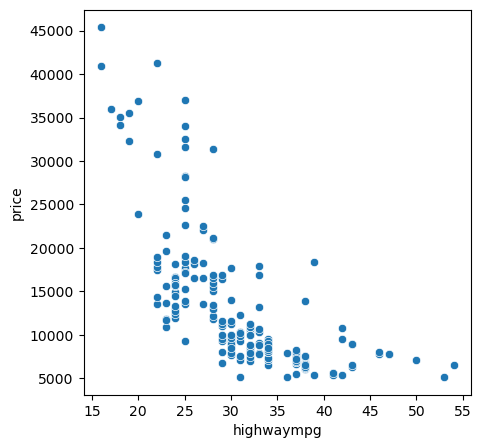

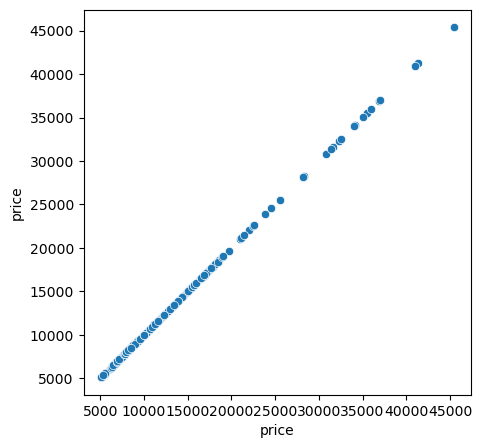

In [7]:
for i in numerical_feature:
    if i != "car_ID":
        plt.figure(figsize=(5,5))
        sns.scatterplot(x=i, y='price', data=df)
        plt.show()
        

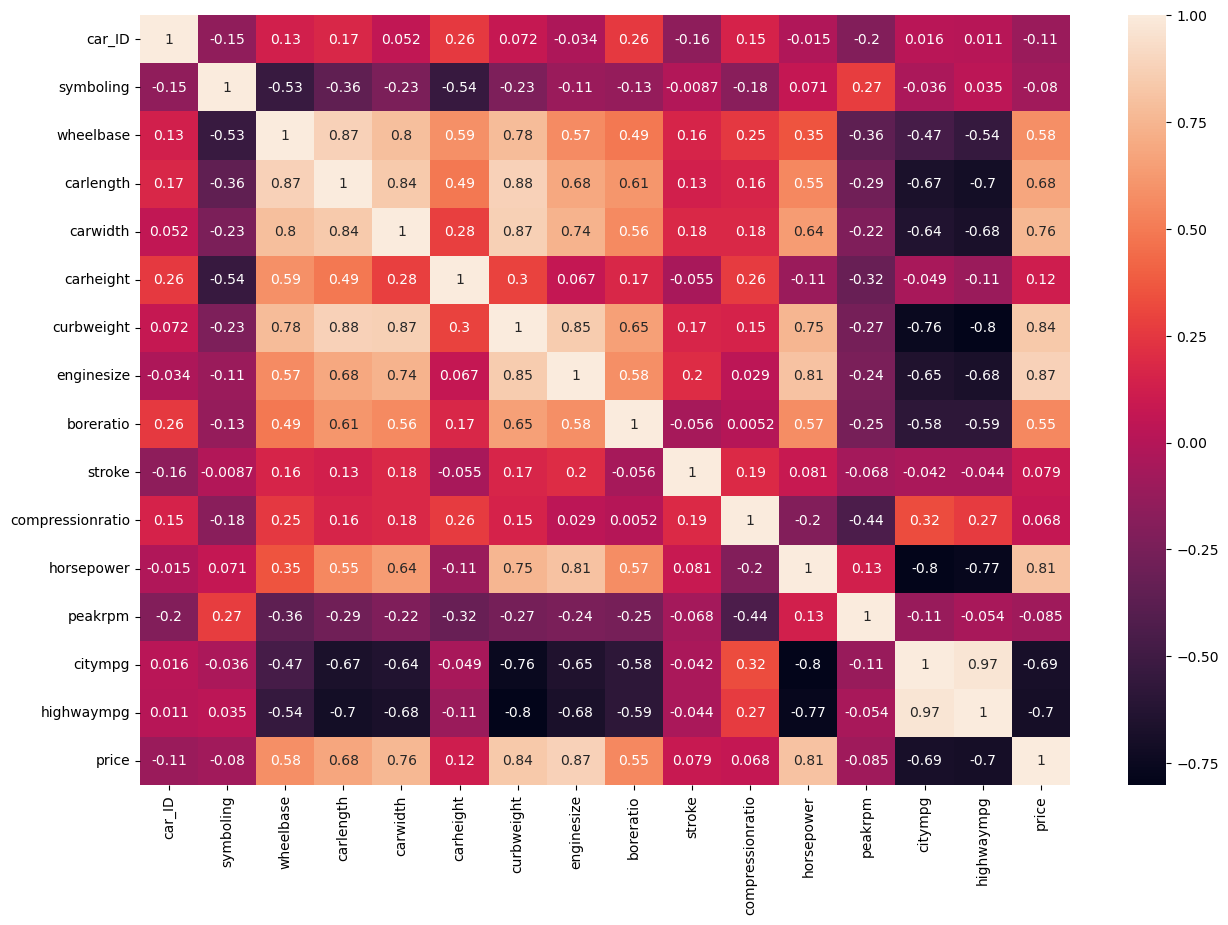

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical_feature].corr(), annot=True)
plt.show()

<Figure size 2500x3000 with 0 Axes>

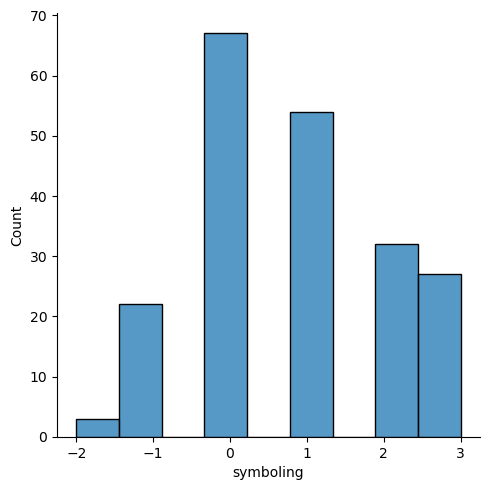

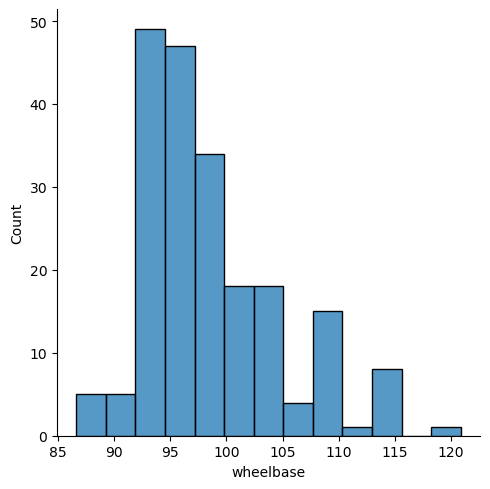

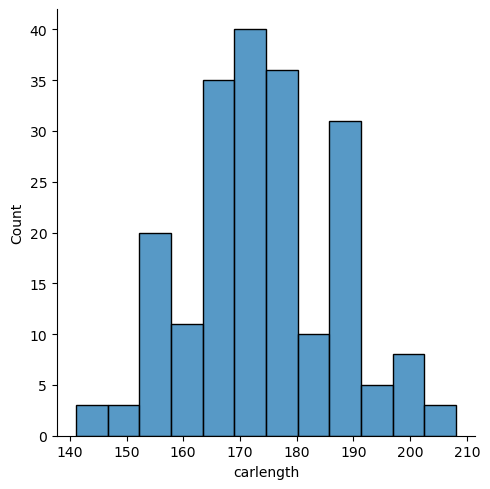

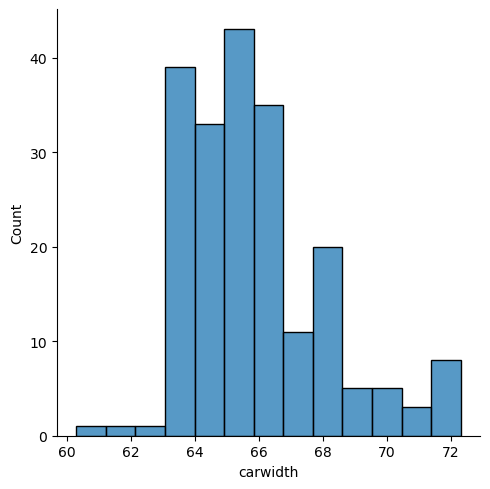

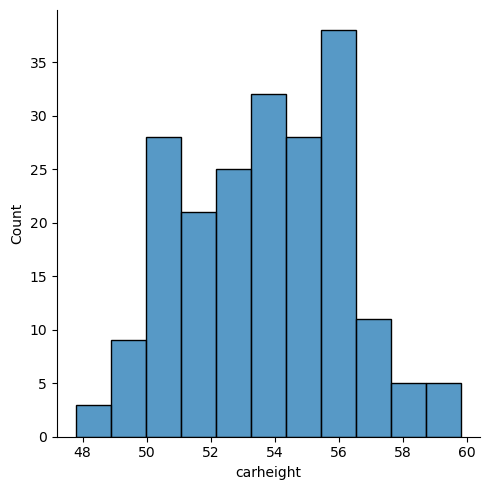

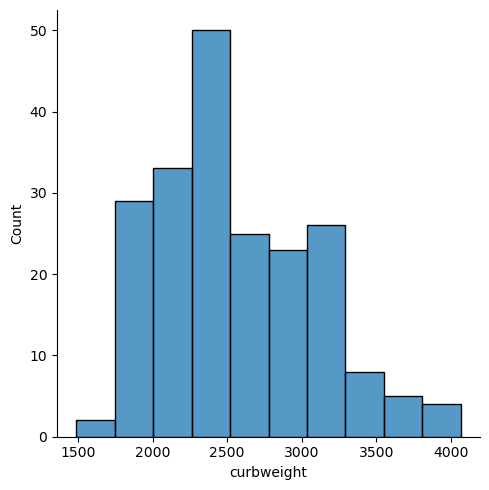

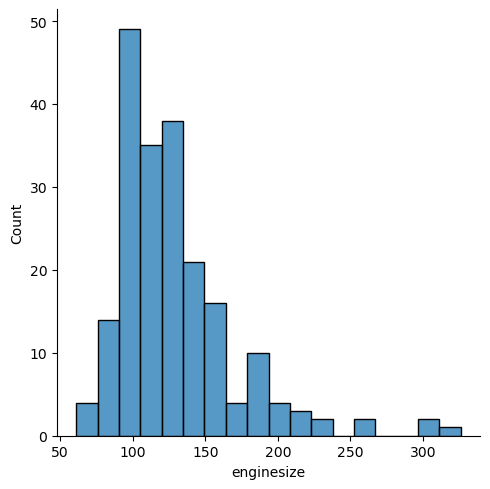

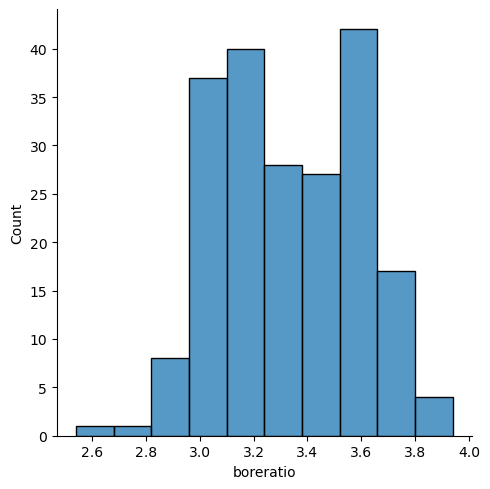

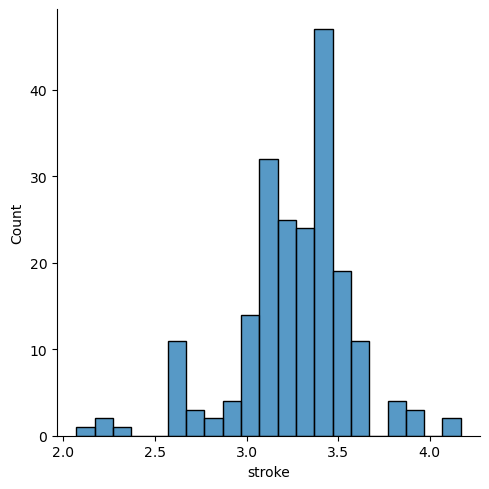

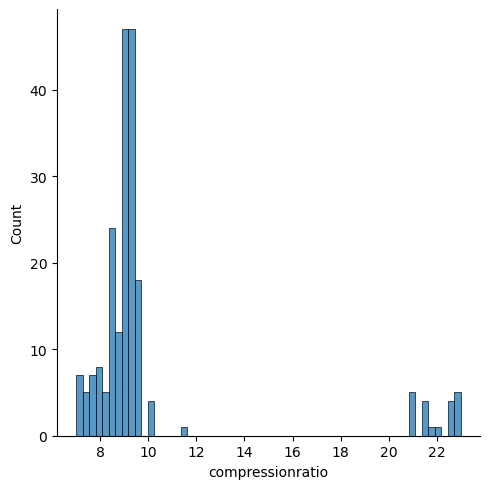

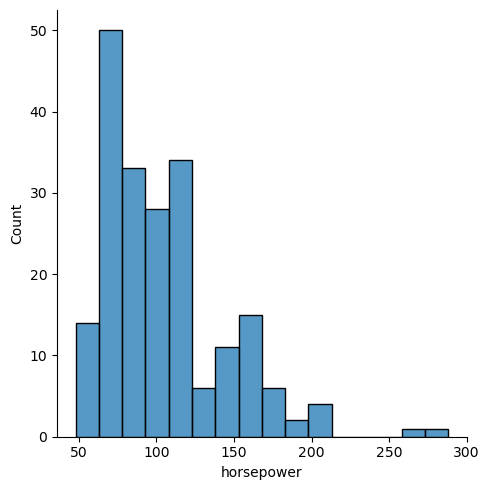

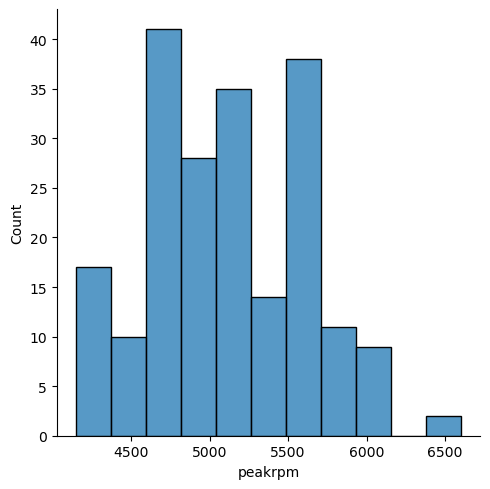

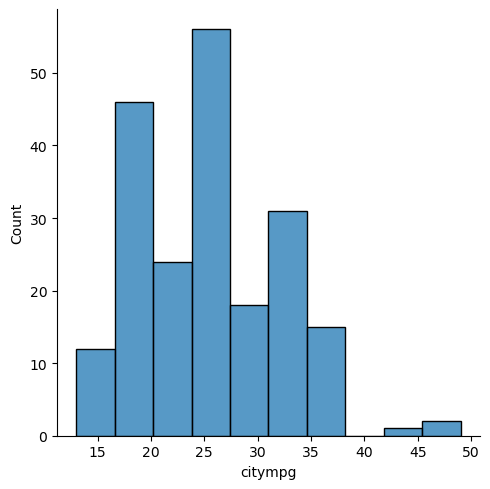

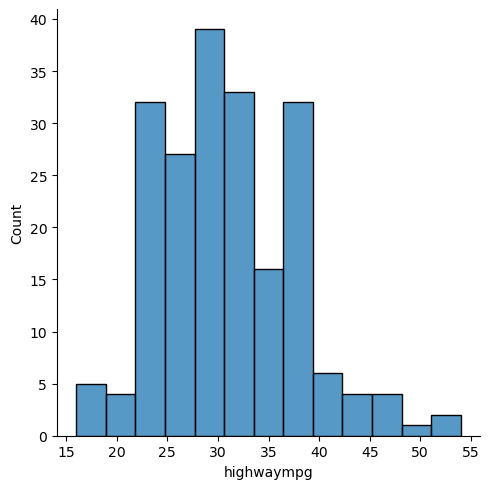

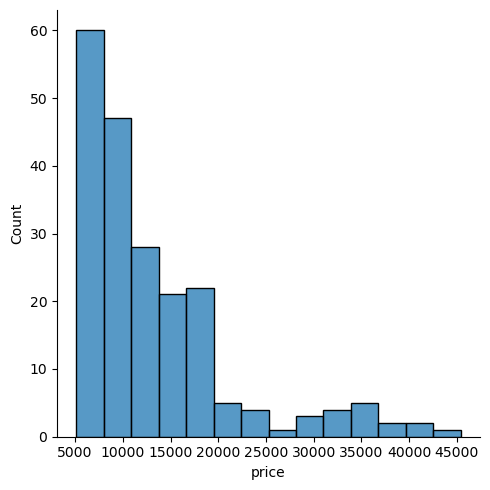

In [9]:
plt.figure(figsize=(25,30))
for i in numerical_feature:
    if i!= 'car_ID' :
        sns.displot(num_data, x=i)
plt.tight_layout()
plt.show()

In [10]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes in ['O', 'object']]
categorical_feature

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [11]:
categorical_data = df[categorical_feature]
categorical_data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


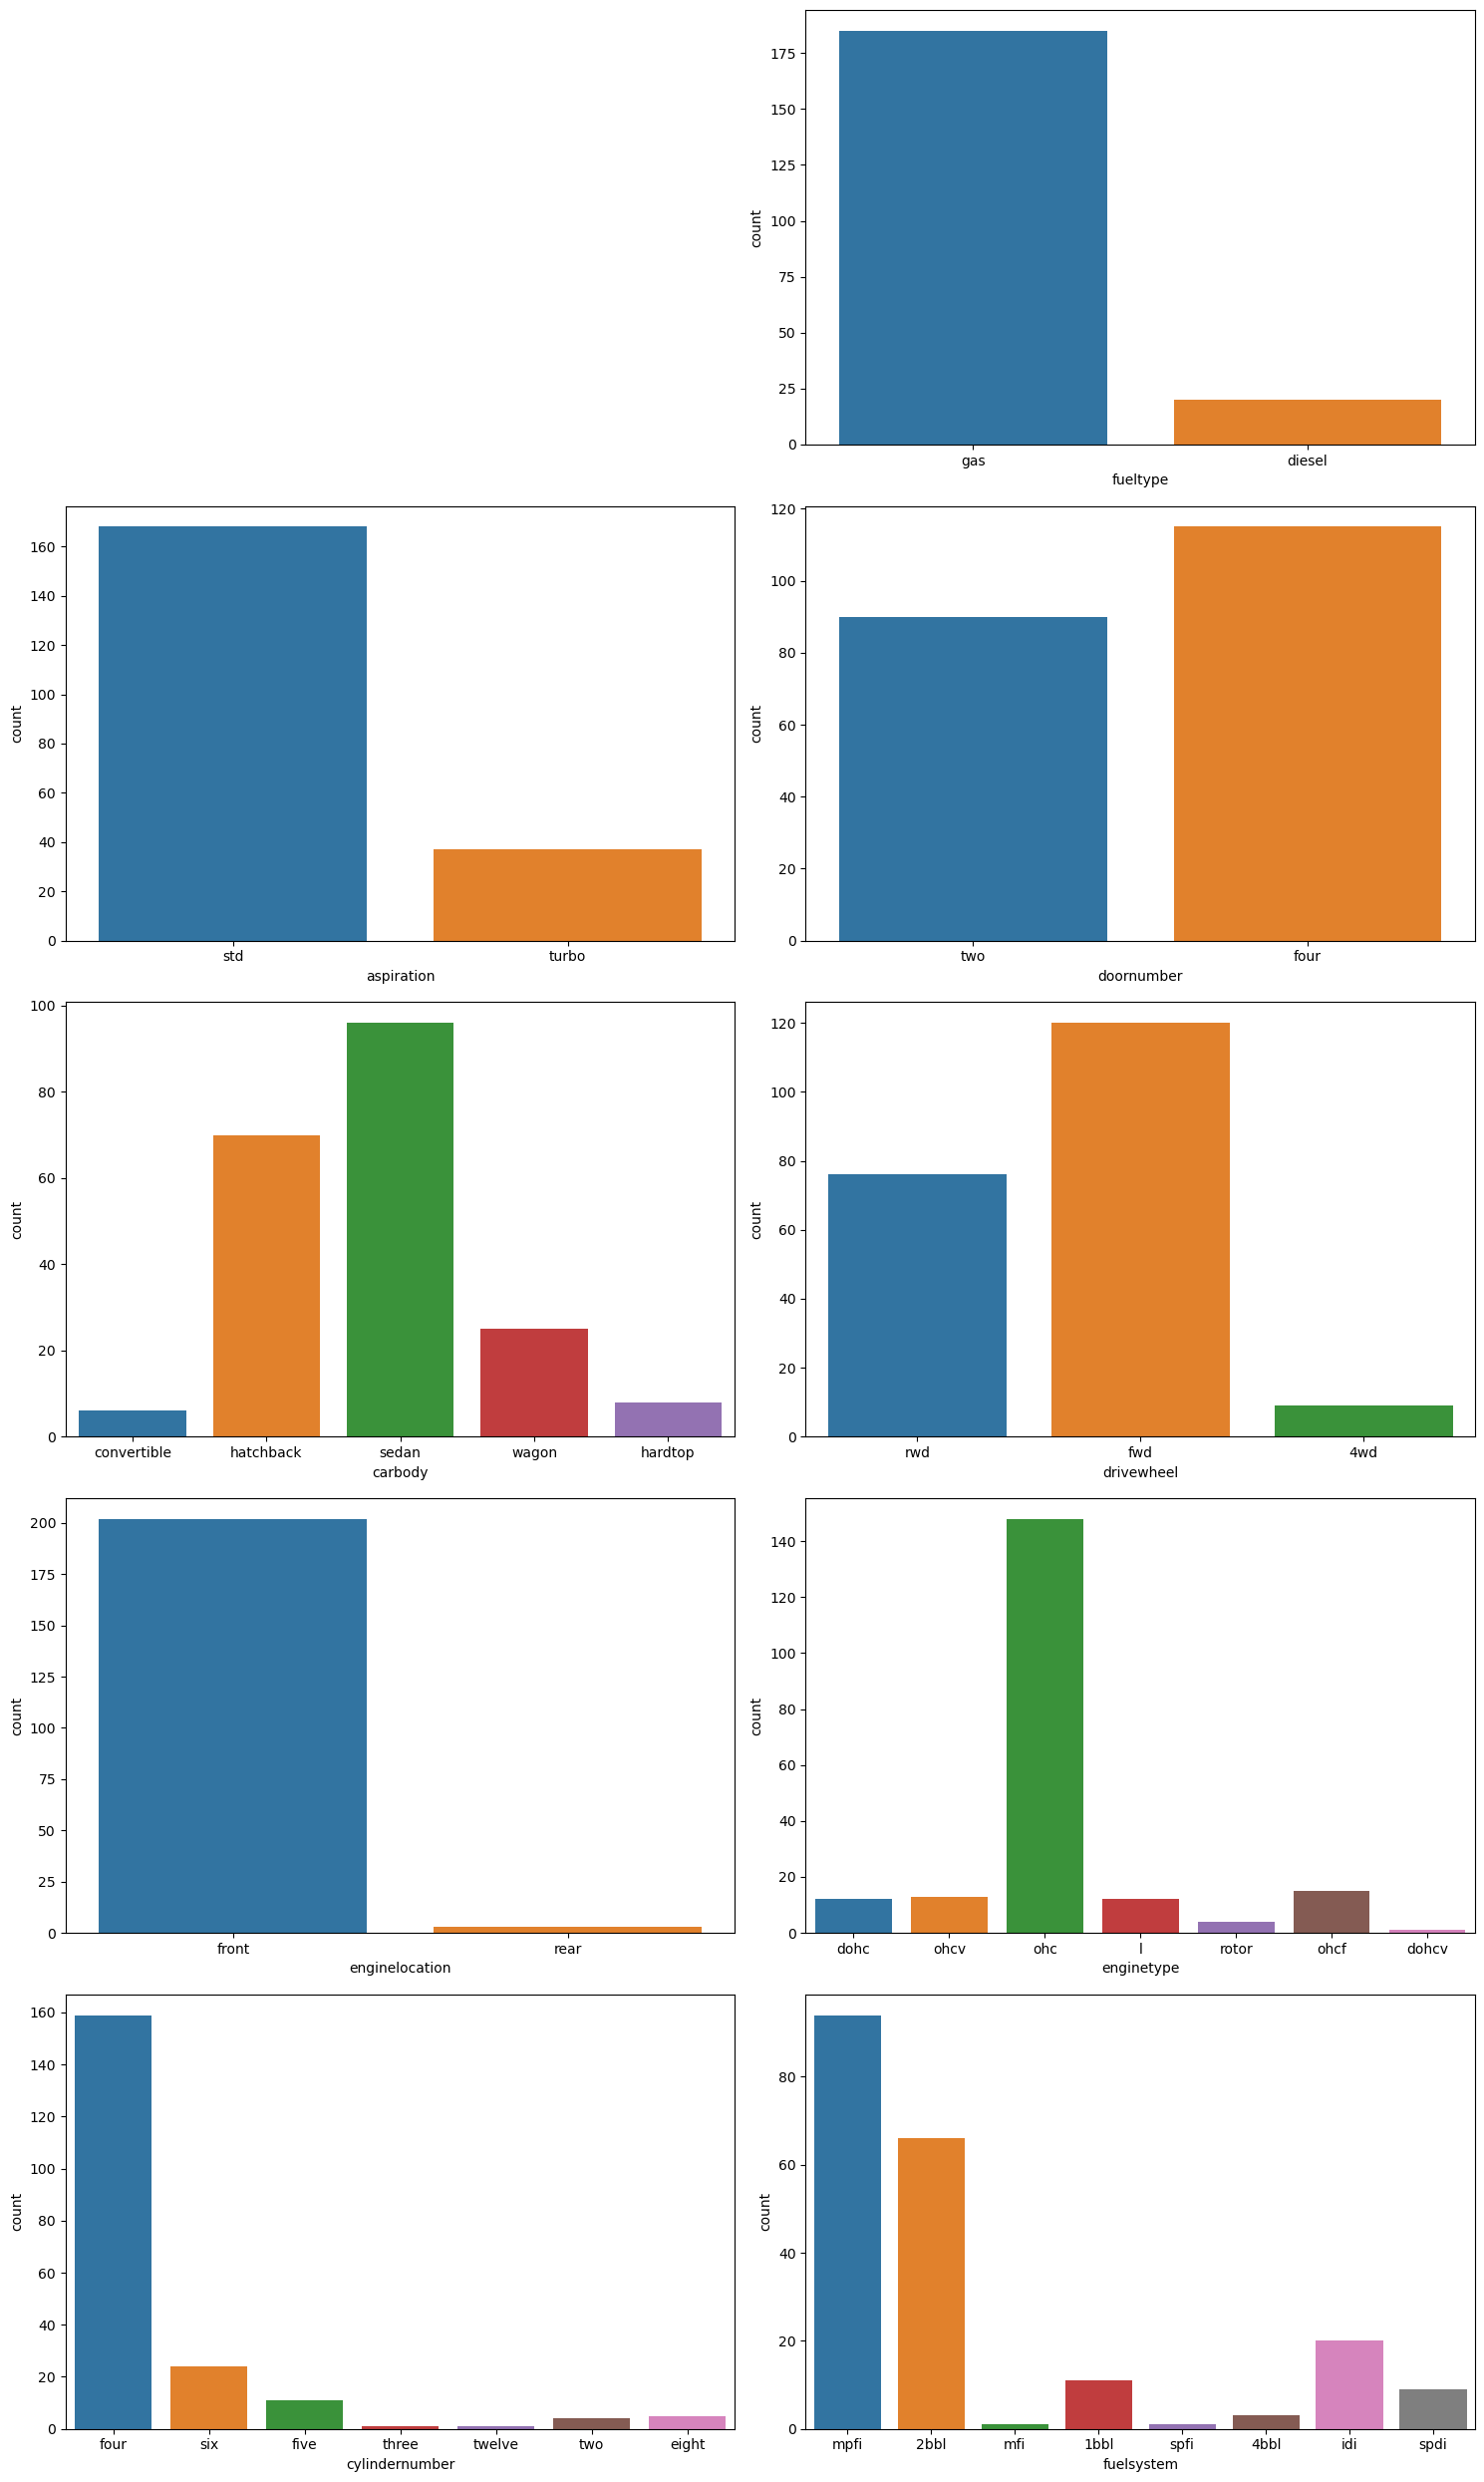

In [12]:
plt.figure(figsize=(15,25))
plot_number = 1
for i in categorical_feature:
    if i!= "CarName" :
        plt.subplot(5, 2, plot_number)
        sns.countplot(x=i, data=categorical_data)
    plot_number = plot_number + 1
plt.tight_layout()
plt.show()

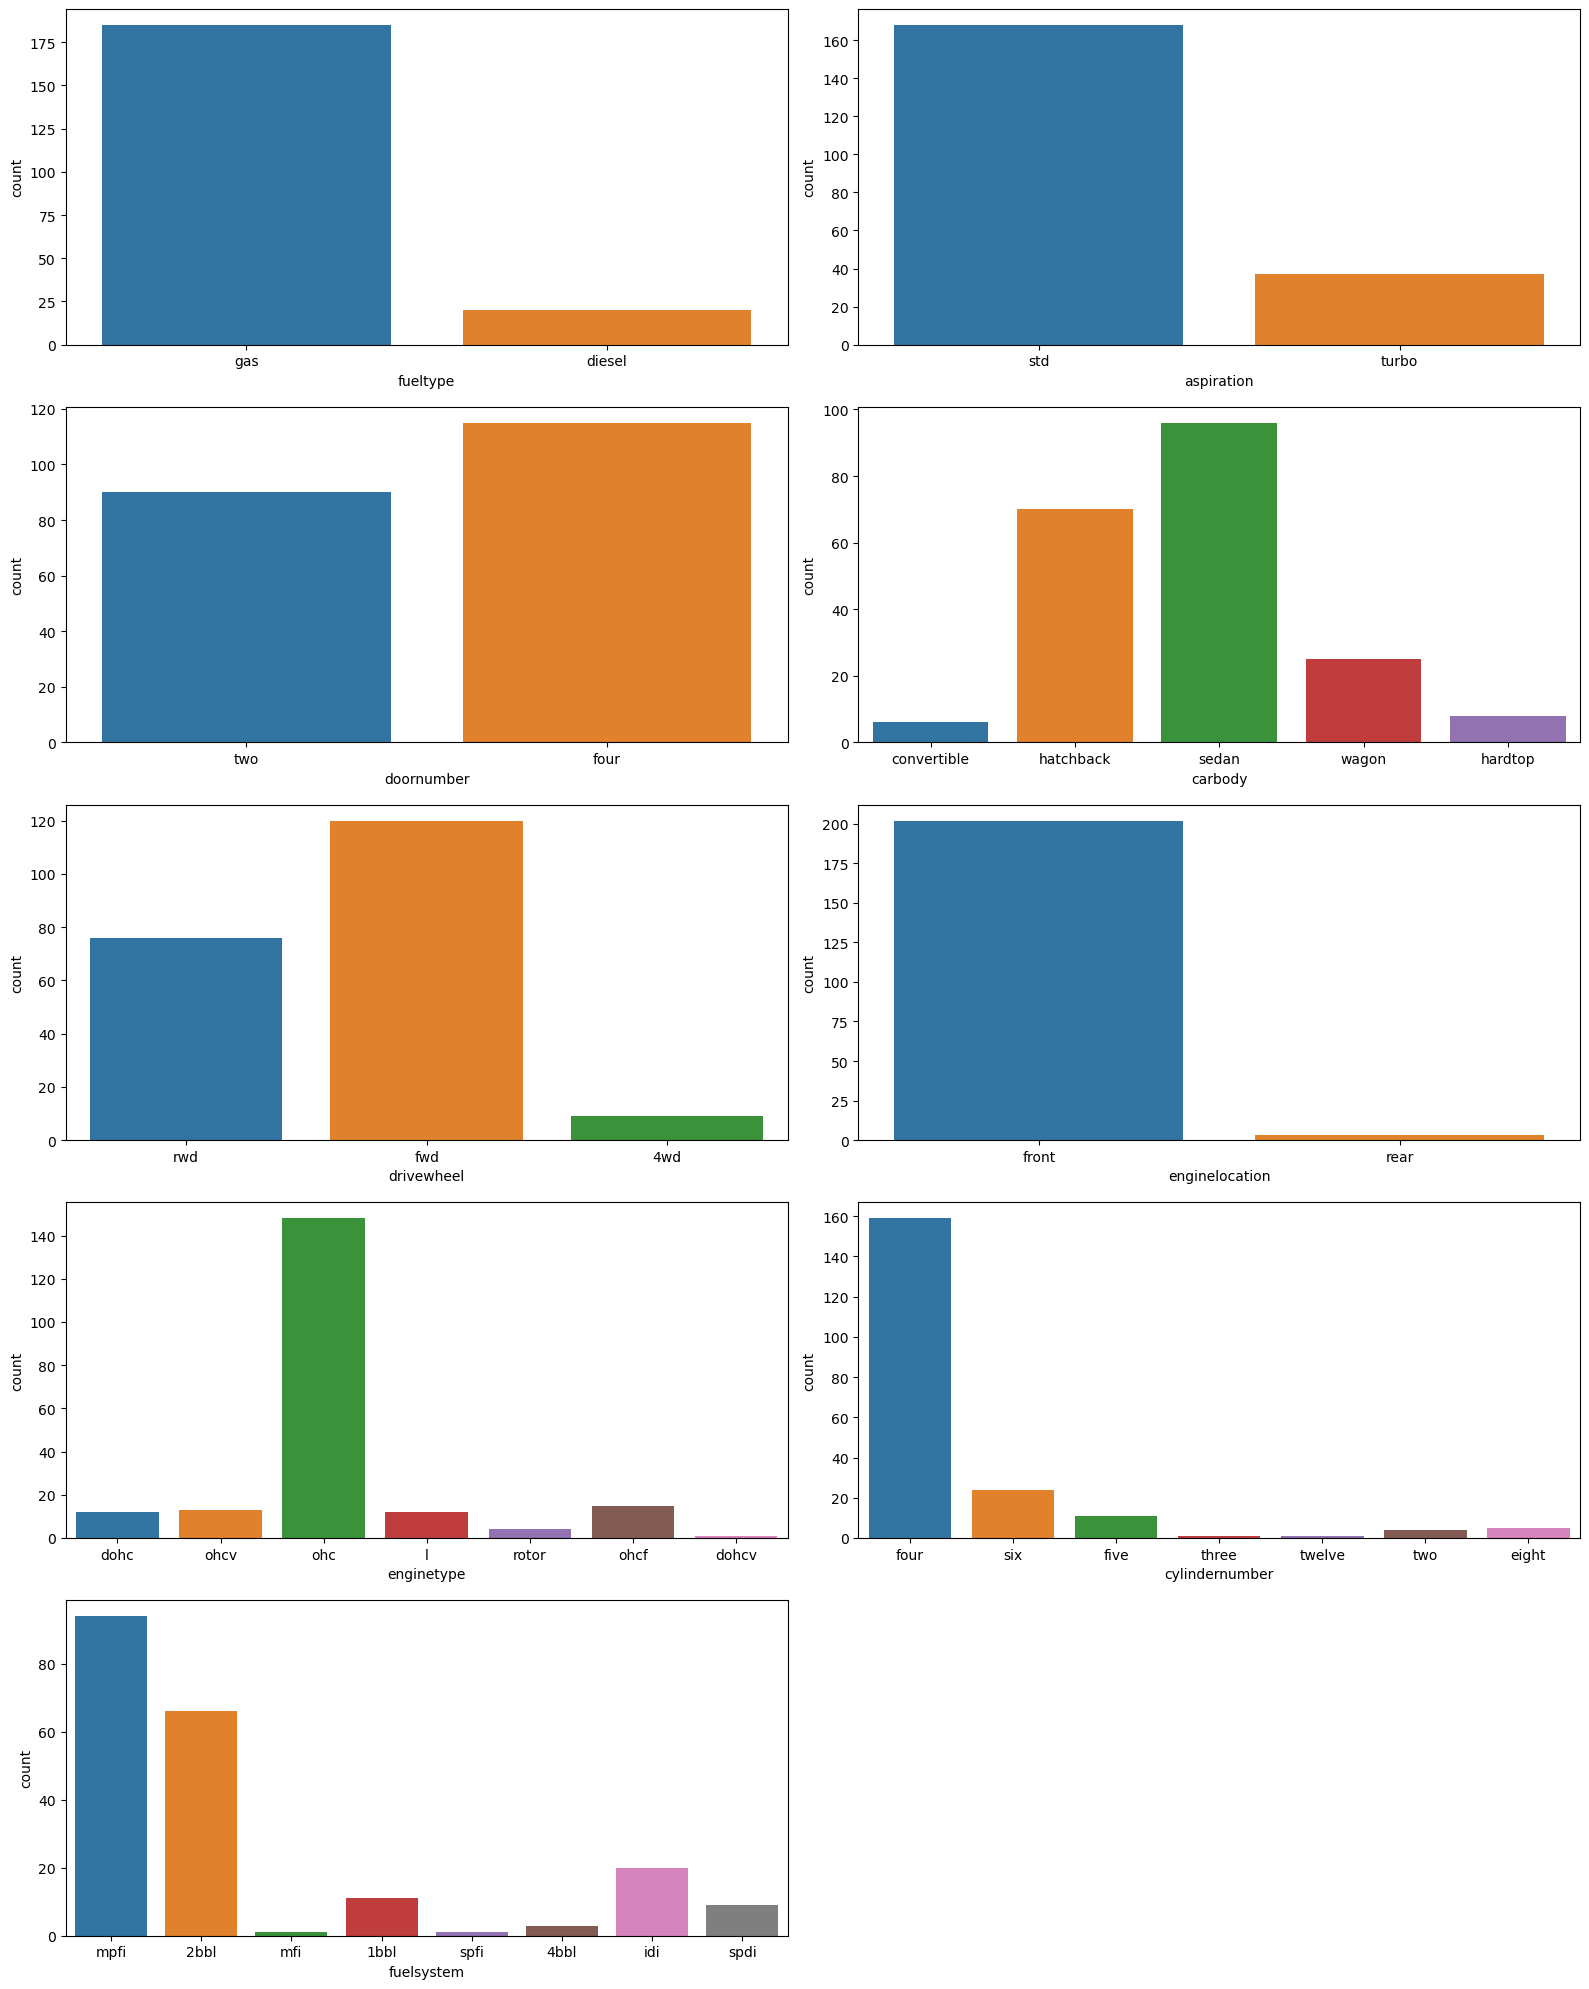

In [13]:
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(categorical_feature)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = categorical_feature[i], data = categorical_data, ax=ax)
#         plt.title(f"\n{categorical_feature[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

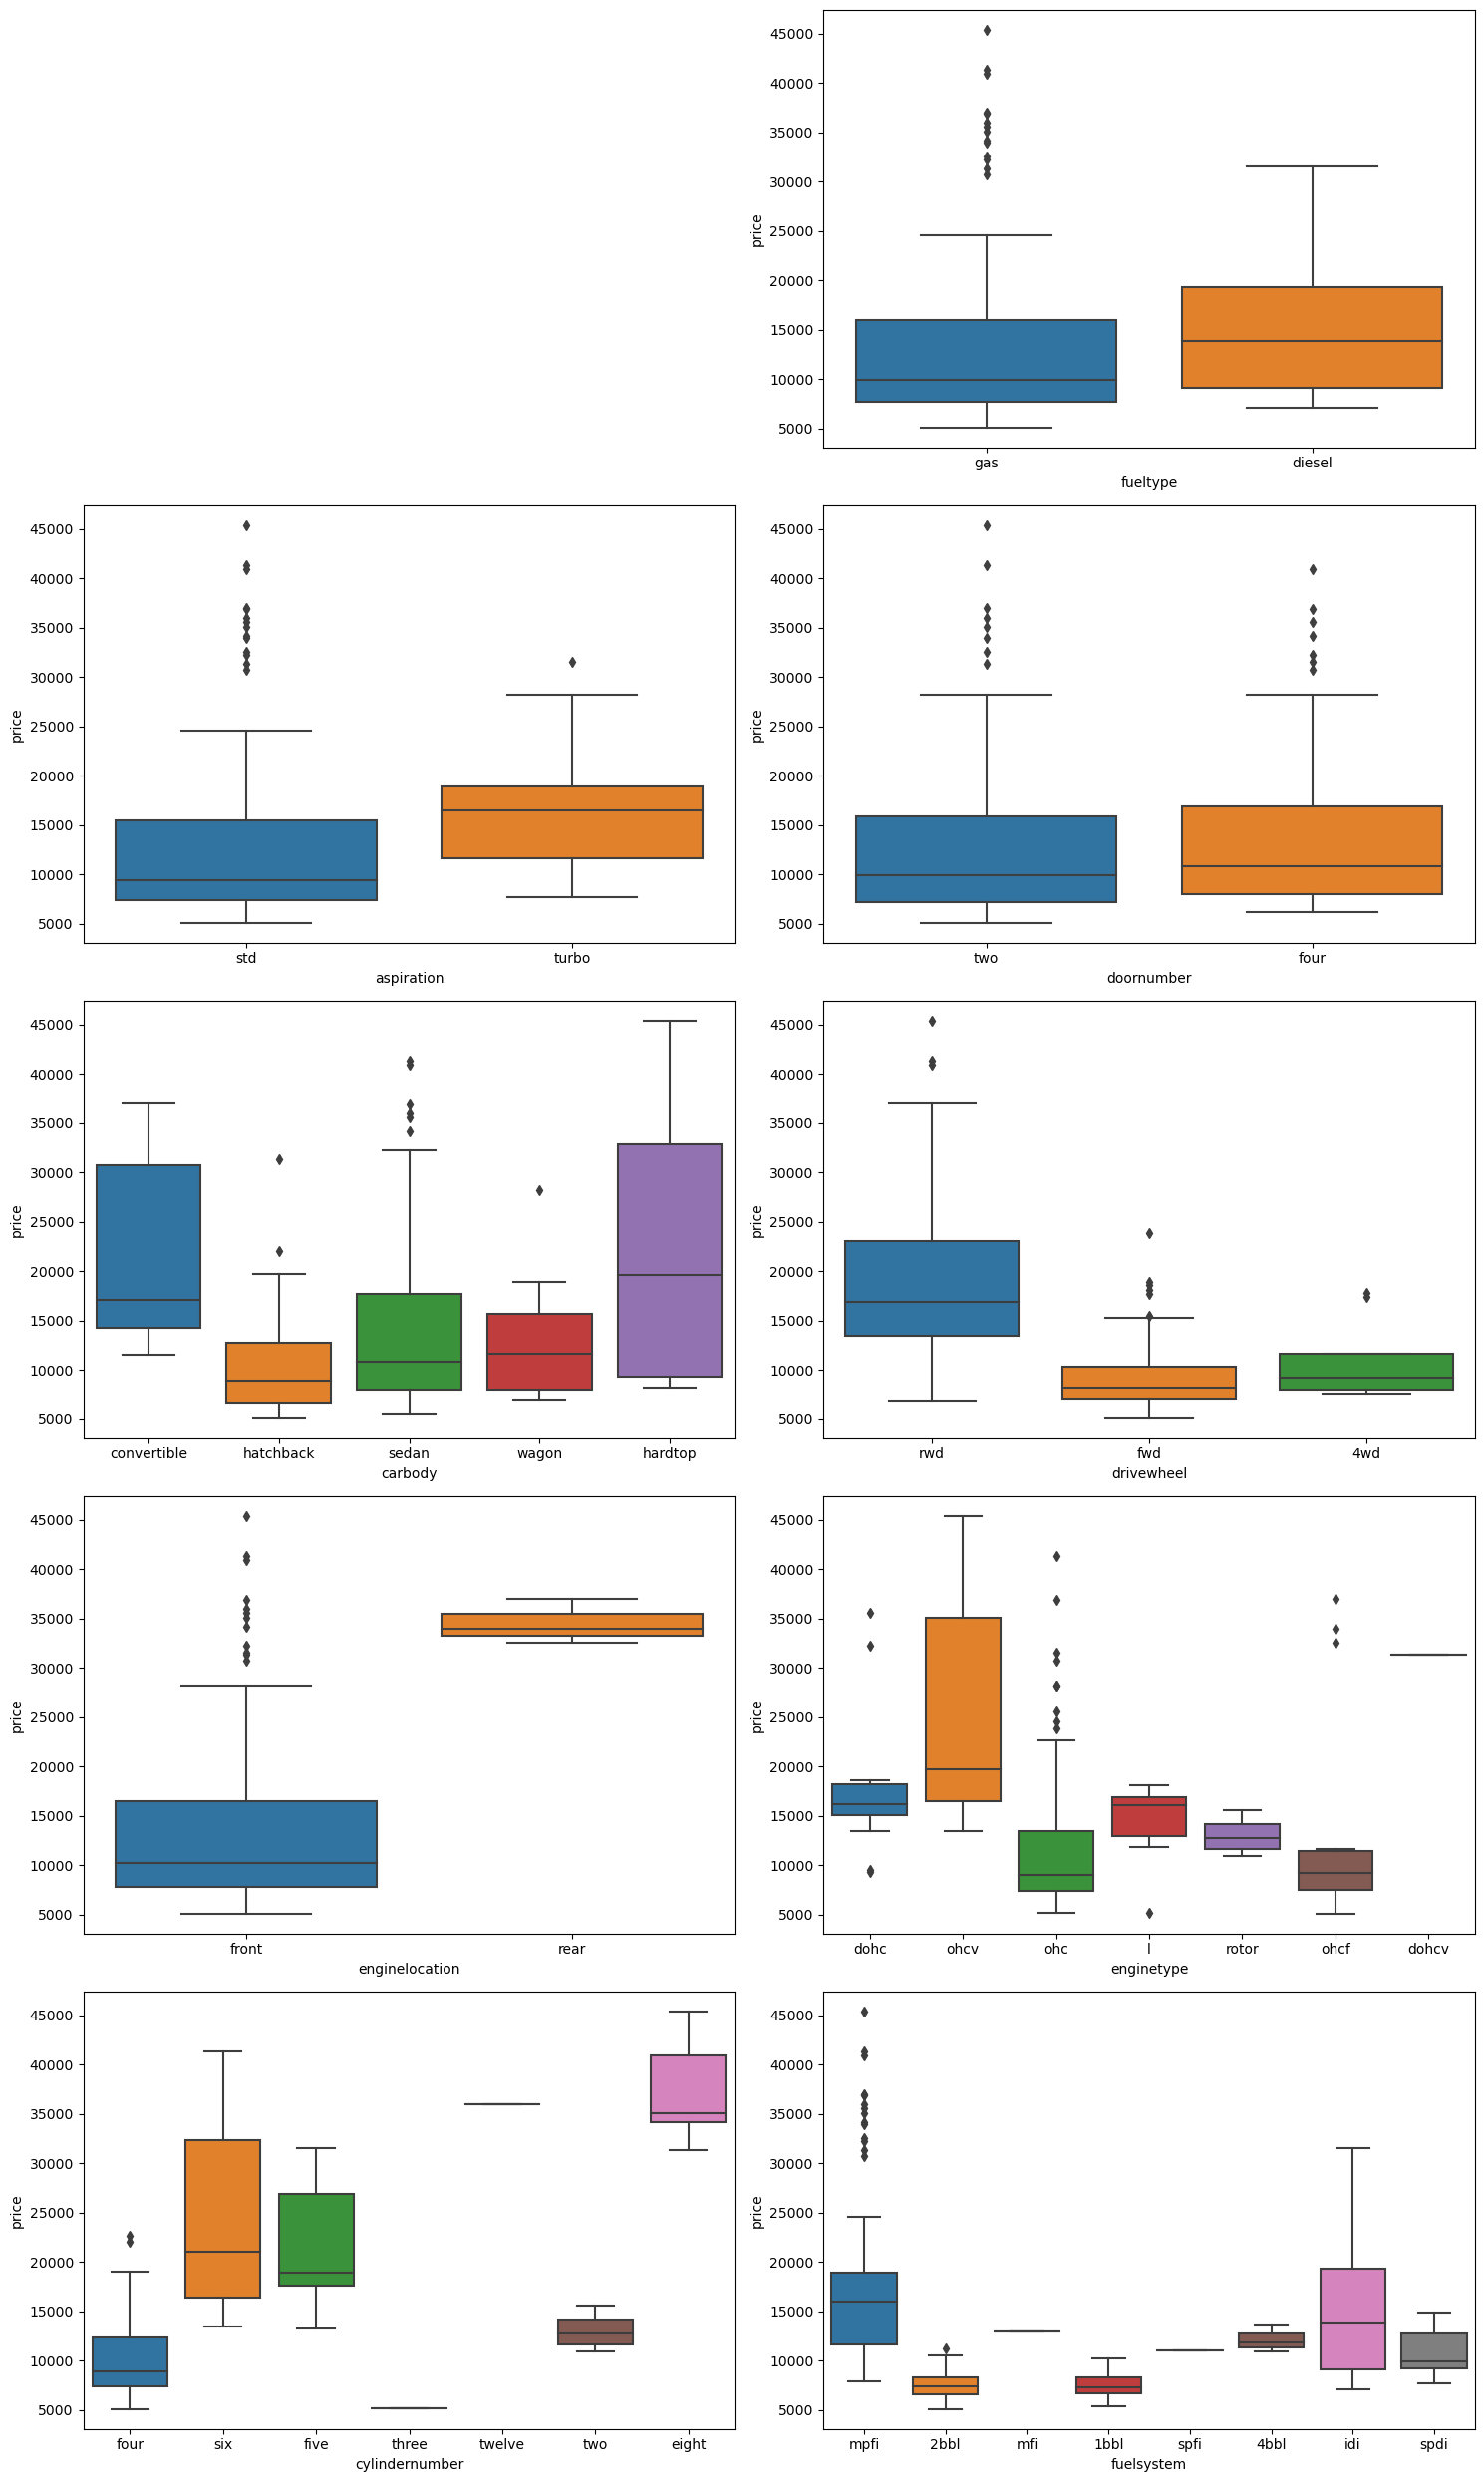

In [14]:
plt.figure(figsize=(15,25))
plot_number = 1
for i in categorical_feature:
    if i!= "CarName" :
        plt.subplot(5, 2, plot_number)
        sns.boxplot(x = i, y = 'price', data=df)
    plot_number = plot_number + 1
plt.tight_layout()
plt.show()

In [15]:
list_unique_car = set(df['CarName'])
list_unique_car = list(list_unique_car)
list_unique_car

['mazda rx-4',
 'bmw x1',
 'nissan rogue',
 'plymouth valiant',
 'volkswagen 411 (sw)',
 'buick electra 225 custom',
 'dodge challenger se',
 'maxda glc deluxe',
 'buick century',
 'mitsubishi mirage',
 'nissan dayz',
 'honda civic (auto)',
 'toyota corolla 1200',
 'bmw 320i',
 'volkswagen super beetle',
 'mazda 626',
 'alfa-romero Quadrifoglio',
 'peugeot 504 (sw)',
 'volkswagen model 111',
 'volvo 144ea',
 'dodge d200',
 'audi 100ls',
 'volkswagen 1131 deluxe sedan',
 'mazda glc custom',
 'volvo 246',
 'nissan latio',
 'nissan titan',
 'subaru brz',
 'toyota tercel',
 'subaru r2',
 'isuzu D-Max V-Cross',
 'mitsubishi mirage g4',
 'nissan otti',
 'mitsubishi lancer',
 'mazda glc custom l',
 'buick skyhawk',
 'volvo 264gl',
 'toyota corolla liftback',
 'isuzu MU-X',
 'peugeot 304',
 'plymouth cricket',
 'bmw z4',
 'mitsubishi montero',
 'plymouth fury iii',
 'toyota starlet',
 'toyota celica gt liftback',
 'mazda glc deluxe',
 'bmw x4',
 'buick century luxus (sw)',
 'porsche boxter',
 

In [16]:
df['Company'] = df['CarName'].apply(lambda x : x.split(" ")[0])
df['Company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: Company, Length: 205, dtype: object

In [17]:
df['Company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Company, dtype: int64

In [18]:
df["Company"] = df["Company"].str.lower()

def replace_name(a,b):
    df["Company"].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [19]:
df['Company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Company, dtype: int64

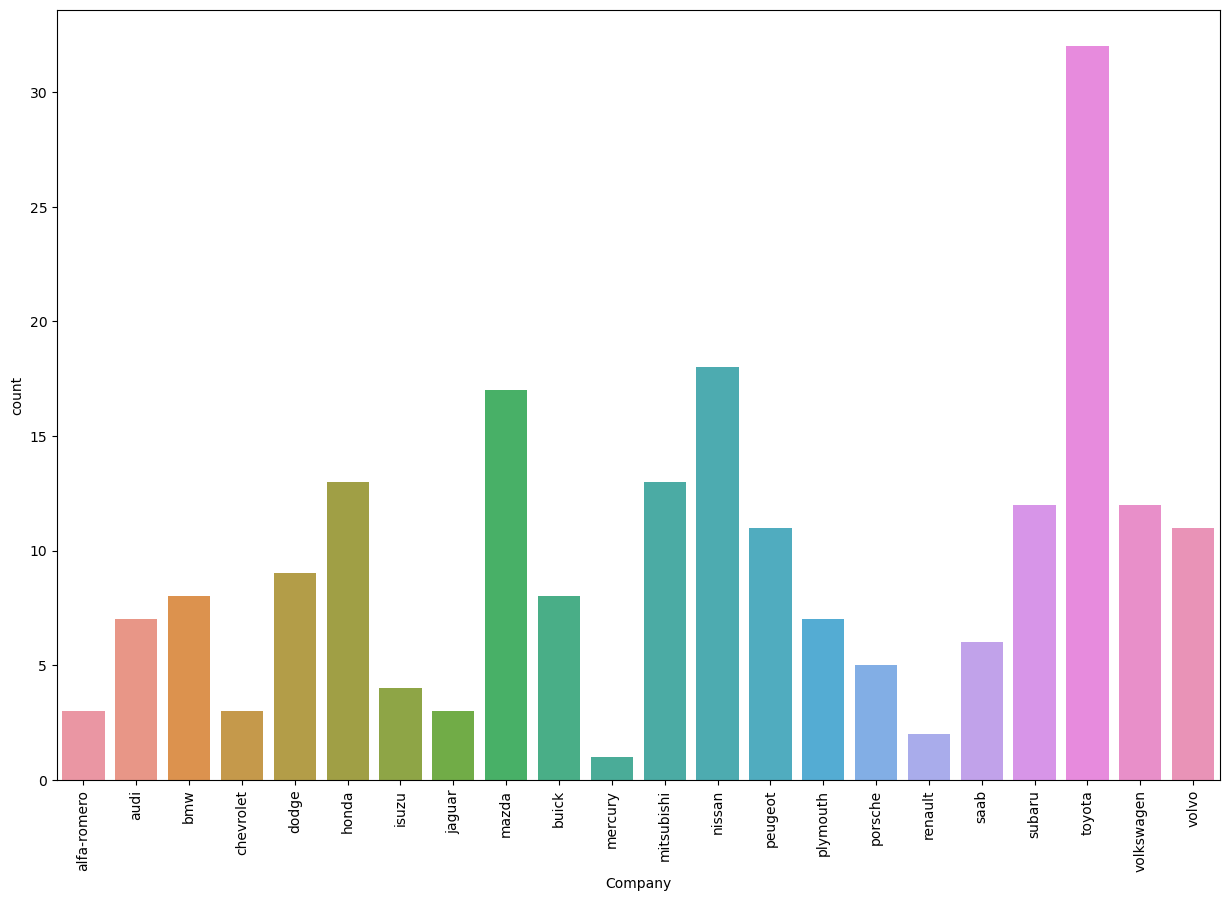

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(x='Company', data=df)
plt.xticks(rotation=90)
plt.show()

In [21]:
df.drop(columns=['car_ID'], axis=1, inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [22]:
X = df.drop(columns=['price', 'CarName', 'symboling', 'peakrpm', 'stroke', 'compressionratio'], axis=1)
Y = df['price']
X

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,Company
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,21,27,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,21,27,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,19,26,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,24,30,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,18,22,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,114,23,28,volvo
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,160,19,25,volvo
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,134,18,23,volvo
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,106,26,27,volvo


In [23]:
X['doornumber'] = X['doornumber'].map({'two': 2, 'four': 4})
X['cylindernumber'] = X['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})
X['fueltype'] = X['fueltype'].map({'gas' :0, 'diesel' : 1})

In [24]:
X

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,Company
0,0,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,111,21,27,alfa-romero
1,0,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,111,21,27,alfa-romero
2,0,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,154,19,26,alfa-romero
3,0,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,102,24,30,audi
4,0,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,115,18,22,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,114,23,28,volvo
201,0,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,160,19,25,volvo
202,0,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,134,18,23,volvo
203,1,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,106,26,27,volvo


In [25]:
dummy_model = pd.get_dummies(X, drop_first=True)
dummy_model

,fueltype,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,0,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,0,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,0,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,0,0,1
201,0,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,0,0,1
202,0,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0,0,0,0,0,0,0,0,0,1
203,1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,0,0,0,0,1


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(dummy_model, i) for i in range(dummy_model.shape[1])]
vif['Features'] = dummy_model.columns

vif

D:\Arun\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,inf,fueltype
1,36.106791,doornumber
2,4707.009002,wheelbase
3,4430.148430,carlength
4,7225.484924,carwidth
5,2308.758021,carheight
6,955.231342,curbweight
7,310.662840,cylindernumber
8,402.856211,enginesize
9,1238.049717,boreratio


In [27]:
dummy_model = dummy_model.drop(columns=['Company_subaru', 'fuelsystem_idi', 'enginelocation_rear', 'fueltype'], axis=1)

In [28]:
from sklearn.model_selection import train_test_split

dummy_model_train, dummy_model_test, Y_train, Y_test = train_test_split(dummy_model, Y, test_size = 0.2, random_state = 42)

In [29]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(dummy_model_train, Y_train)

LinearRegression()

In [30]:
Y_pred = lr_model.predict(dummy_model_test)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(Y_pred, Y_test)
r2_score = r2_score(Y_pred, Y_test)

In [32]:
lr_model.score(dummy_model_test, Y_test)

0.8990013533317898